In [1]:
import sys
import os.path
import numpy as np
import pandas as pd
import wave
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
from collections import OrderedDict
from scipy import signal
from scipy.optimize import curve_fit 
from functools import wraps

# ディレクトリの絶対パスを取得
current_dir = os.path.dirname(os.path.abspath("__file__"))
# モジュールのあるパスを追加
sys.path.append( str(current_dir) + '/../../programs' )

get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline

plt.rcParams['font.family'] ='IPAPGothic' #使用するフォント
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.top'] = True #x軸の目盛線の上側を表示
plt.rcParams['ytick.right'] = True #y軸の目盛線の右側を表示
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 #軸の線幅edge linewidth。囲みの太さ
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.dpi'] = 100 #dpiの設定
plt.rcParams['figure.subplot.hspace'] = 0.3 # 図と図の幅
plt.rcParams['figure.subplot.wspace'] = 0.3 # 図と図の幅

fig = plt.figure(figsize=(8, 11))

<Figure size 800x1100 with 0 Axes>

In [2]:
from plot_tool import plot_3charts
import research_tools

Window Not Found


In [3]:
N = 1024            # サンプル数
fs = 1024
dt = 1/fs            # サンプリング周期 [s]
f1, f2, f3 = 10, 60, 300 # 周波数 [Hz]

t = np.arange(0, N*dt, dt) # 時間 [s]
x = 3*np.sin(2*np.pi*f1*t) + 0.3*np.sin(2*np.pi*f2*t) + 0.2*np.sin(2*np.pi*f3*t) # 信号

### Design a filter
`scipy.signal.firwin(numtaps, cutoff, width=None, 
                    window='hamming', pass_zero=True, 
                    scale=True, nyq=None, fs=None)`

In [4]:
filter1 = signal.firwin(numtaps=51, cutoff=40, width=None, 
                            window='hamming', pass_zero=True, 
                            scale=True, nyq=None, fs=1/dt)

### Adapt a filter
`scipy.signal.lfilter(b, a, x, axis=-1, zi=None)`
$$
\displaystyle  H(z)=\frac{\sum_{k=0}^{M} b_k z^{-k} } {\sum_{k=0}^{N}  a_k z^{-k} } 
$$

In [5]:
y1 = signal.lfilter(filter1, 1, x)

In [6]:
F1 = np.fft.fft(y1)
Amp1 = np.abs(F1/(N/2))
Amp1[0] = Amp1[0]/2

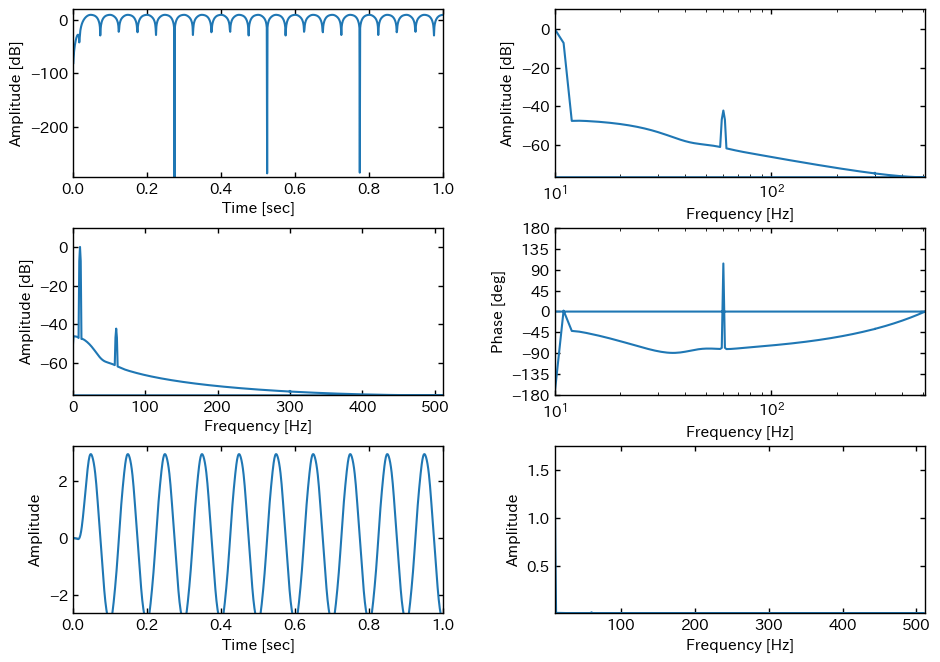

In [7]:
plot_3charts(N=N, y=y1, fs=fs, start_sec=0, window_func_name="hamming")

In [8]:
y1_res = research_tools.ResearchTools(y=y1, fs=fs, fft_N=N, window="hamming")

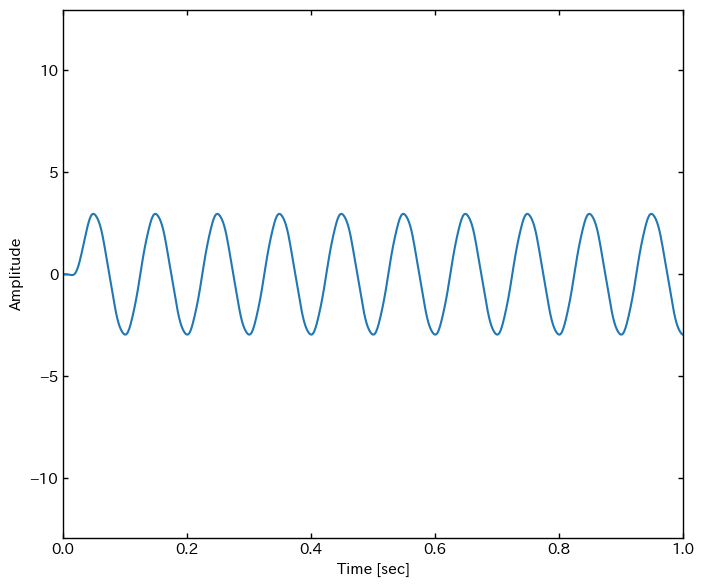

In [9]:
y1_res.plot_y_time()

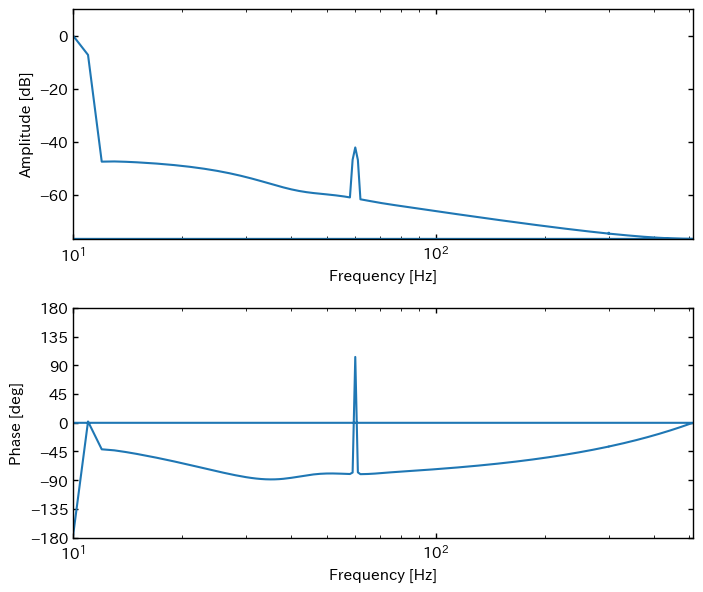

In [10]:
y1_res.plot_freq_analysis_log()

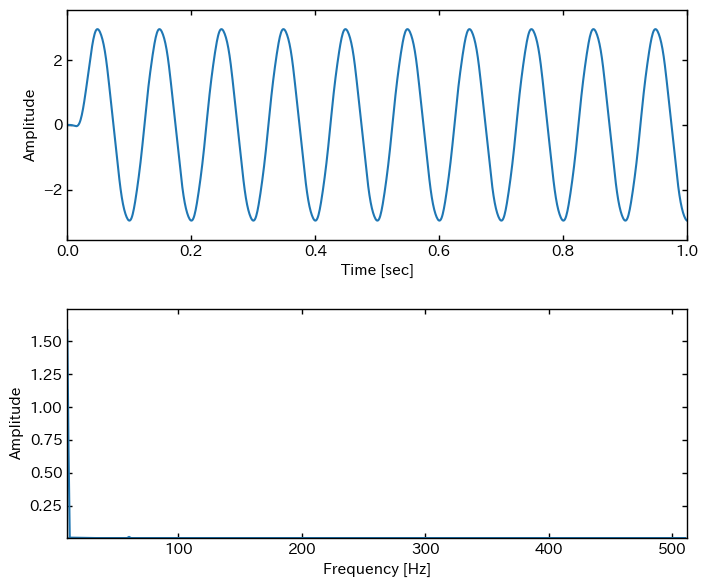

In [11]:
y1_res.plot_freq_analysis()

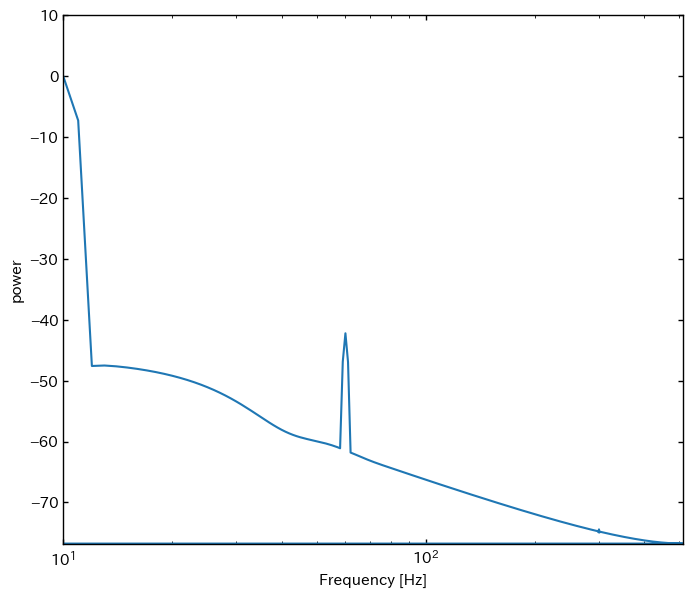

In [12]:
y1_res.plot_power_gain_spectrum()

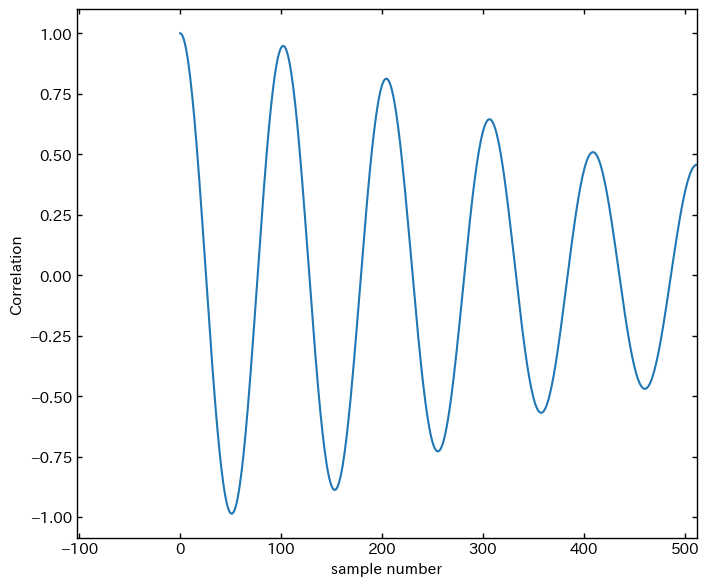

In [13]:
y1_res.plot_acf()

In [14]:
y1_res.acf

array([1.        , 0.99809283, 0.99241076, ..., 0.98297736, 0.99241076,
       0.99809283])

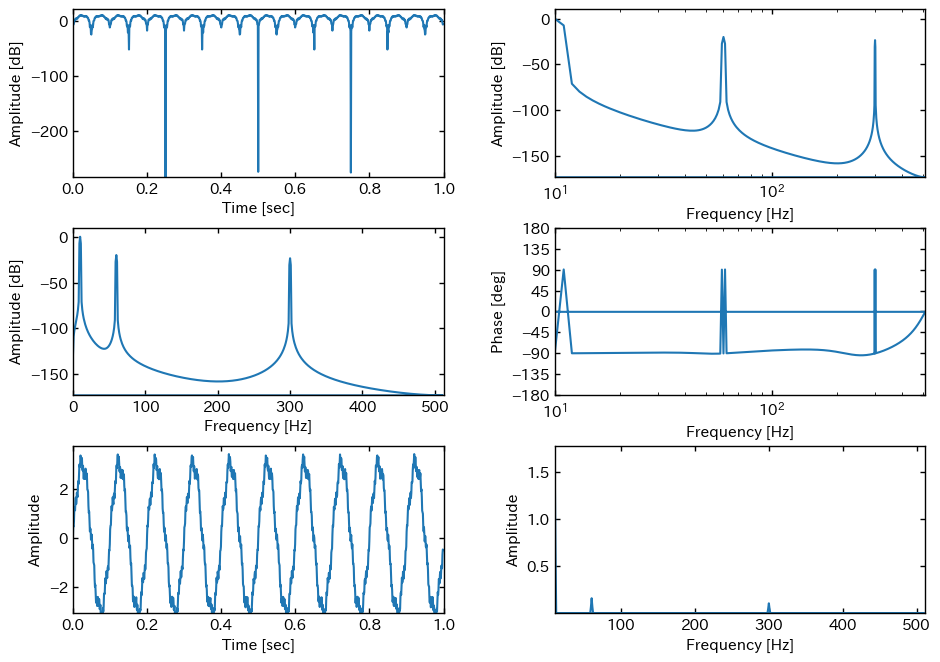

In [15]:
plot_3charts(N=N, y=x, fs=fs, start_sec=0, window_func_name="hamming")

In [16]:
filter2 = signal.firwin(numtaps=51, cutoff=100, fs=fs, pass_zero=False)
y2 = signal.lfilter(filter2, 1, x)

F2 = np.fft.fft(y2)
Amp2 = np.abs(F2/(N/2))
Amp2[0] = Amp2[0]/2

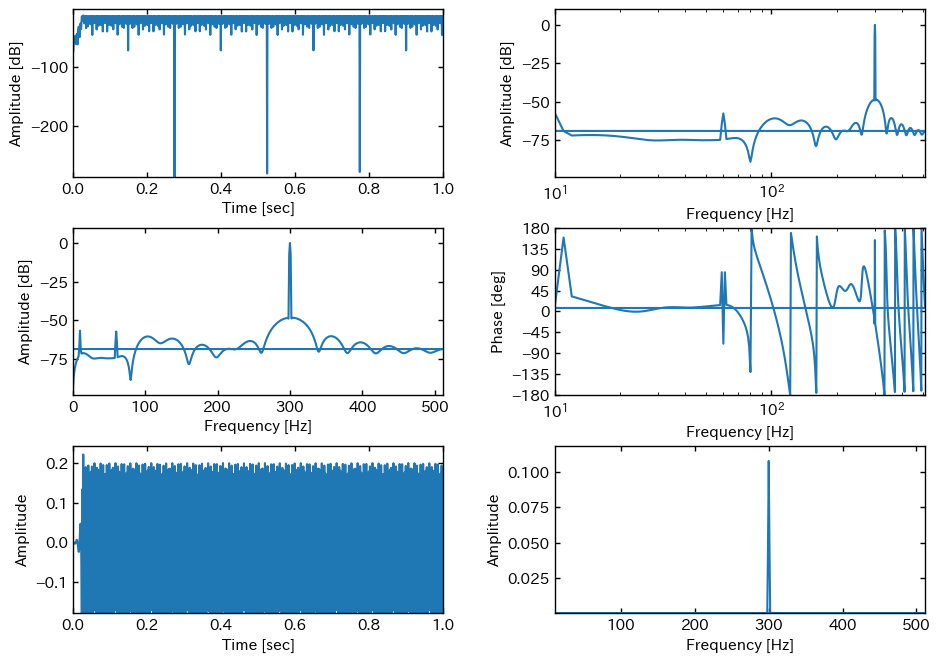

In [17]:
plot_3charts(N=N, y=y2, fs=fs, start_sec=0, window_func_name="hamming")

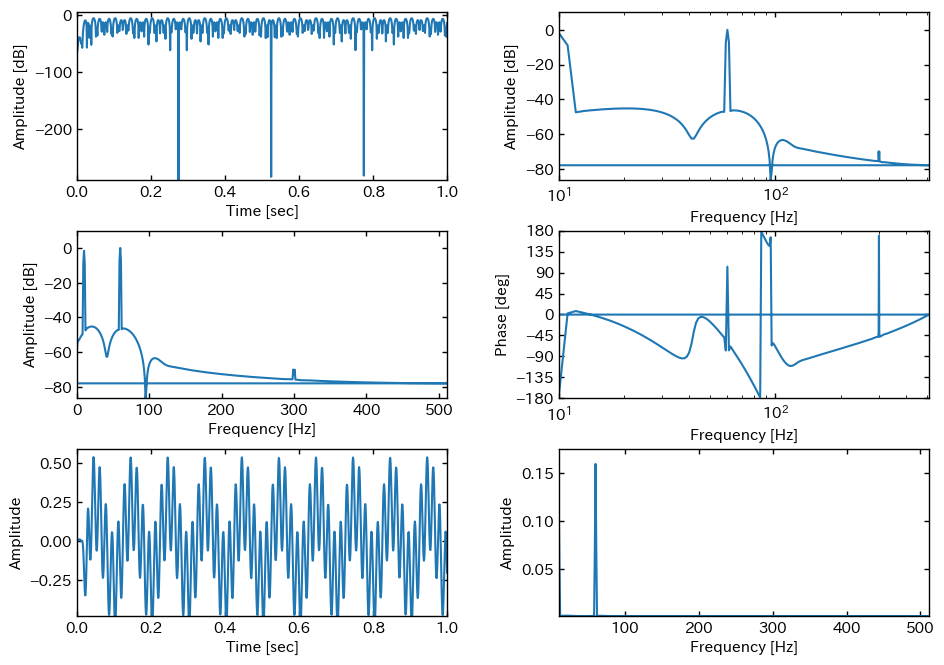

In [18]:
filter3 = signal.firwin(numtaps=51, cutoff=[30, 100], fs=1/dt, pass_zero=False)
y3 = signal.lfilter(filter3, 1, x)

F3 = np.fft.fft(y3)
Amp3 = np.abs(F3/(N/2))
Amp3[0] = Amp3[0] / 2
plot_3charts(N=N, y=y3, fs=fs, start_sec=0, window_func_name="hamming")

# クラスバージョンのテスト

In [19]:
t2 = np.arange(0, N*dt, dt) # 時間 [s]
x2 = 300*np.sin(2*np.pi*10*t)

In [20]:
x2_res = research_tools.ResearchTools(y=x2, N=N, fs=fs, window="hamming")

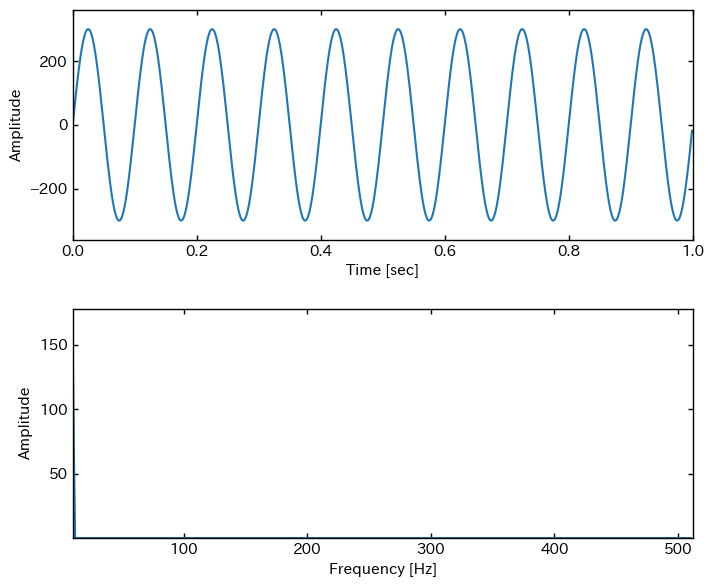

In [21]:
x2_res.plot_freq_analysis()

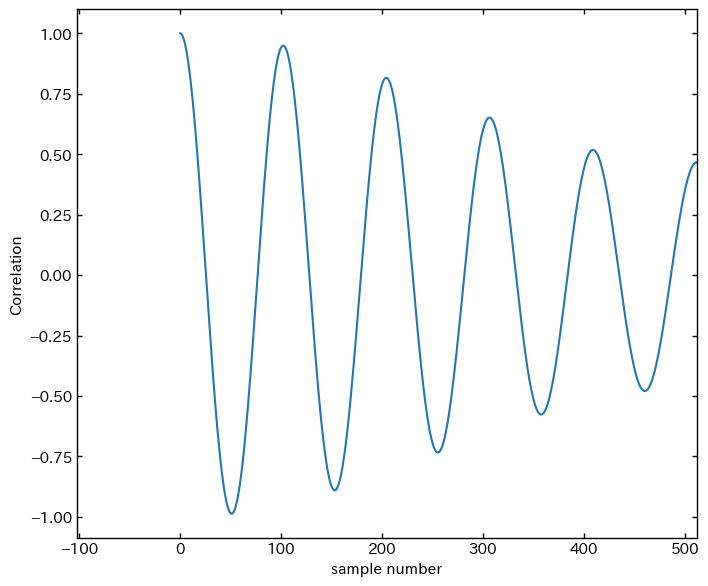

In [22]:
x2_res.plot_acf()

In [23]:
x2_rec = research_tools.ResearchTools(y=x2, N=N, fs=fs, window="rectangular")

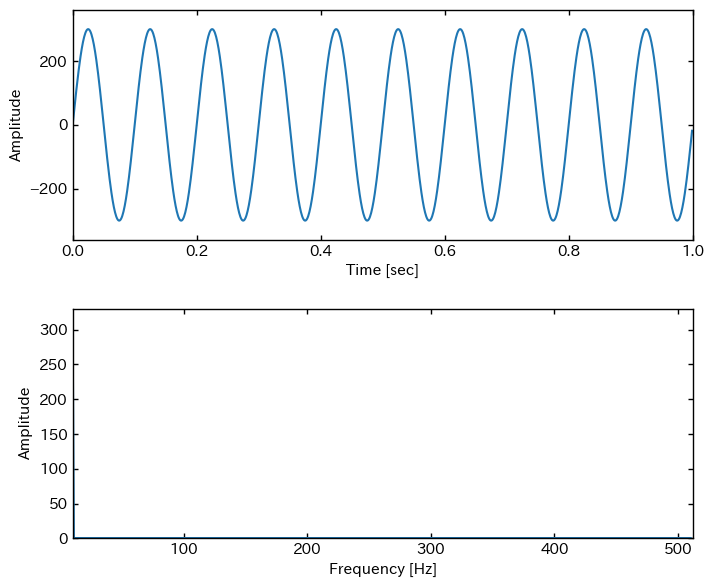

In [24]:
x2_rec.plot_freq_analysis()

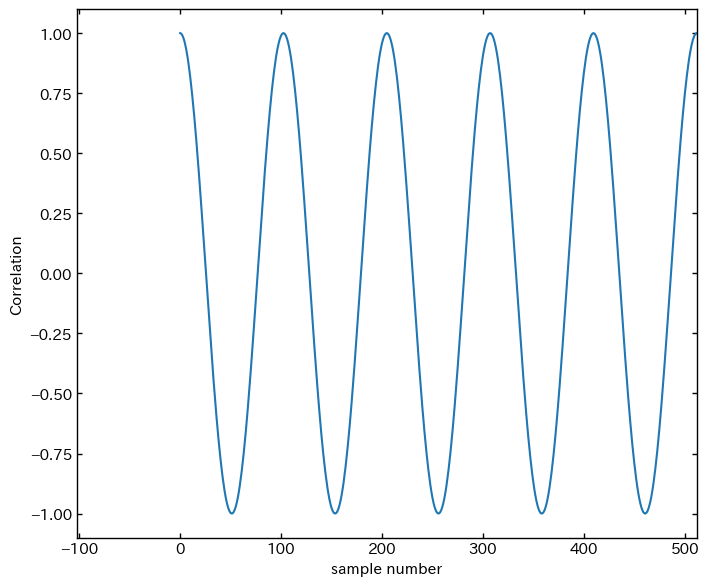

In [25]:
x2_rec.plot_acf()

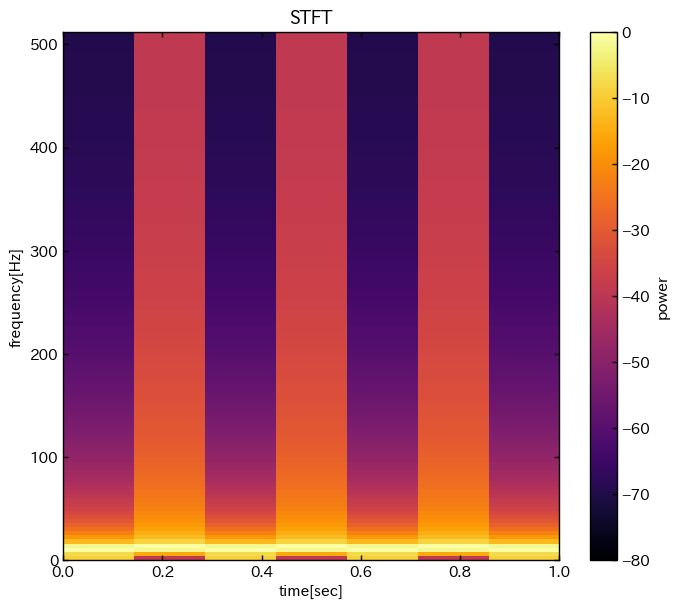

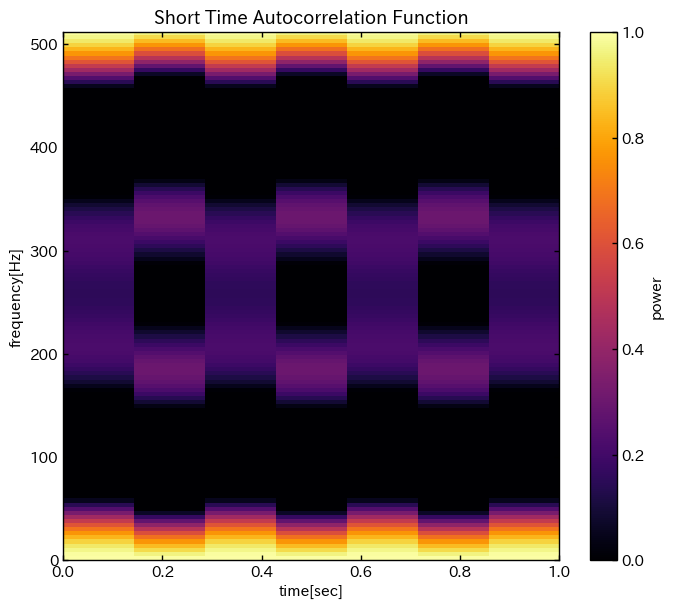

In [26]:
x2_rec.plot_spectrogram_acf()

In [27]:
x_rand = 300 * np.sin(2*np.pi*10*t2) + 200 * np.sin(2*np.pi*20*t2) + 200 * np.sin(2*np.pi*8*t2) + 50 * (np.random.rand(len(t2)) - 0.5)

In [28]:
x_rres = research_tools.ResearchTools(y=x_rand, fft_N=N, fs=fs, window="rectangular")

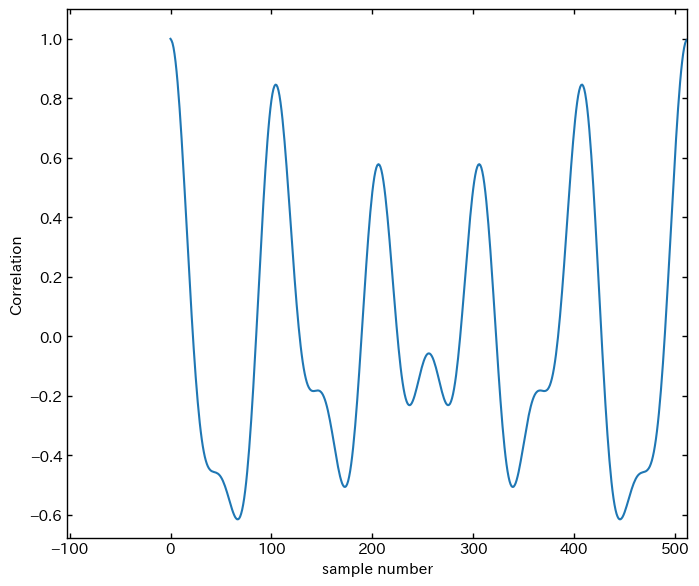

In [29]:
x_rres.plot_acf()

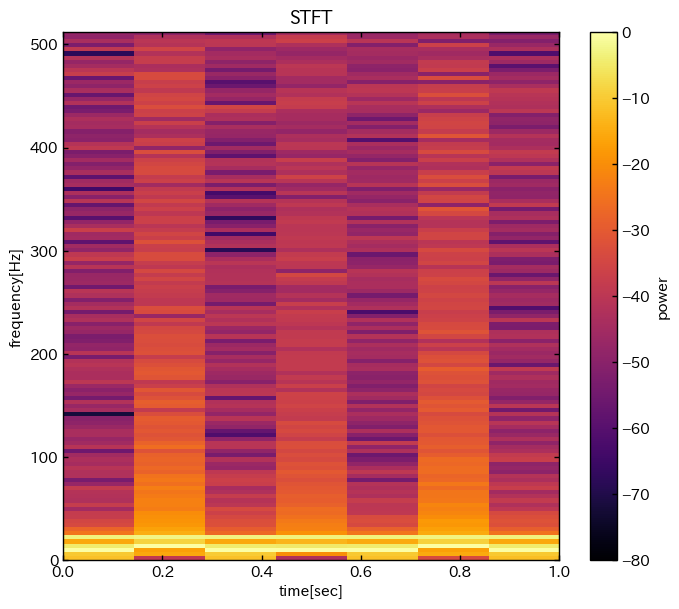

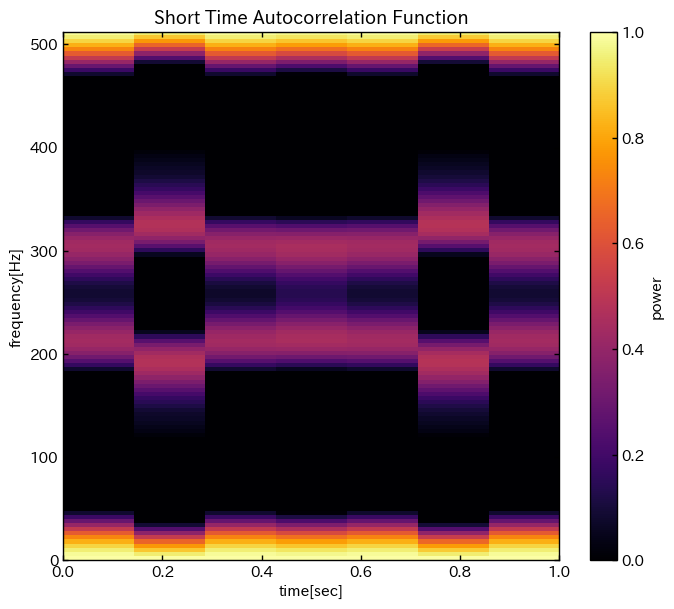

In [30]:
x_rres.plot_spectrogram_acf()

In [31]:
import wave_process

In [32]:
wav = wave_process.wave_process("../../sample_wav/fukushima.wav")

分析対象ファイル： ../../sample_wav/fukushima.wav
チャンクサイズ： 3098892
サンプルサイズのバイト数： 2
チャンネル数： 1
wavファイルのサンプリング周波数： 48000
パラメータ :  _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=3098892, comptype='NONE', compname='not compressed')
wavファイルのデータ個数： 3098892


In [33]:
wav_r = research_tools.ResearchTools(y=wav.data[:524288], fft_N=524288, fs=wav.fs, window="hamming")

/Users/tetsu/personal_files/Research/filters/test/../../programs/research_tools.py:88: RuntimeWarning: divide by zero encountered in log10
  self.y_gain = 20.0 * np.log10(y_abs)  # Gain of y


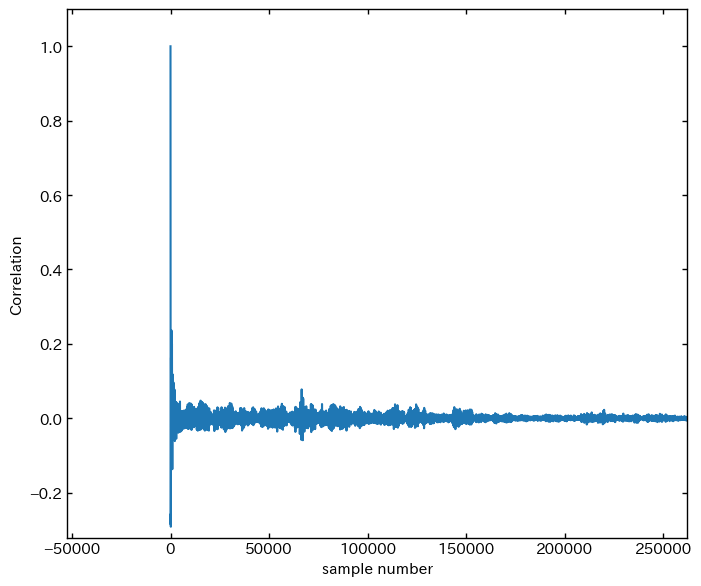

In [34]:
wav_r.plot_acf()

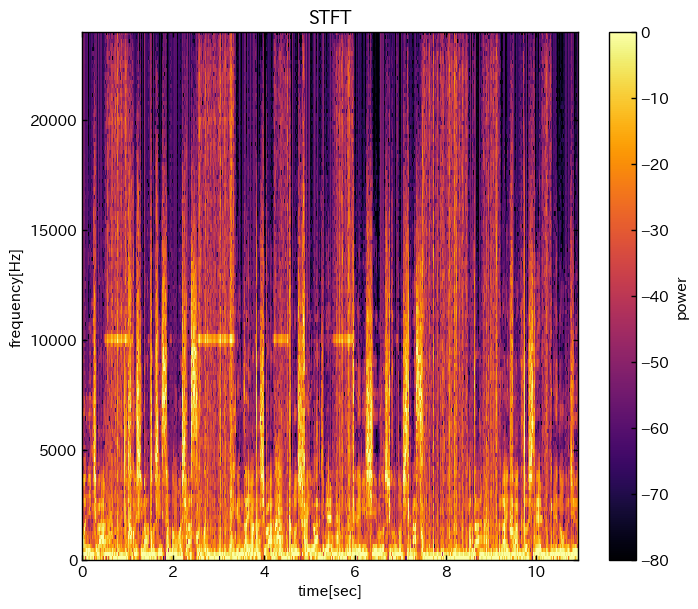

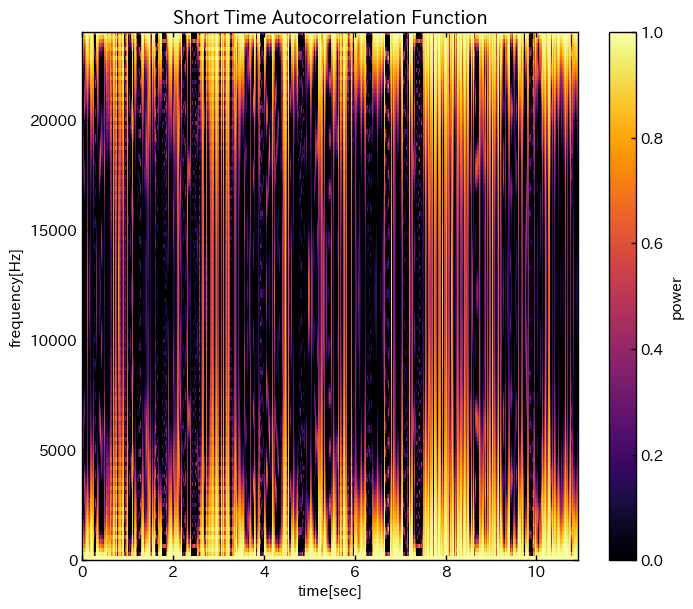

In [35]:
wav_r.plot_spectrogram_acf()

In [36]:
filter5 = signal.firwin(numtaps=51, cutoff=10000, width=None, 
                            window='hamming', pass_zero=True, 
                            scale=True, nyq=None, fs=wav.fs)
wav_lpf = signal.lfilter(filter5, 1, wav.data[:524288])

In [37]:
wav_rlpf = research_tools.ResearchTools(y=wav_lpf, fft_N=524288, fs=wav.fs, window="hamming")

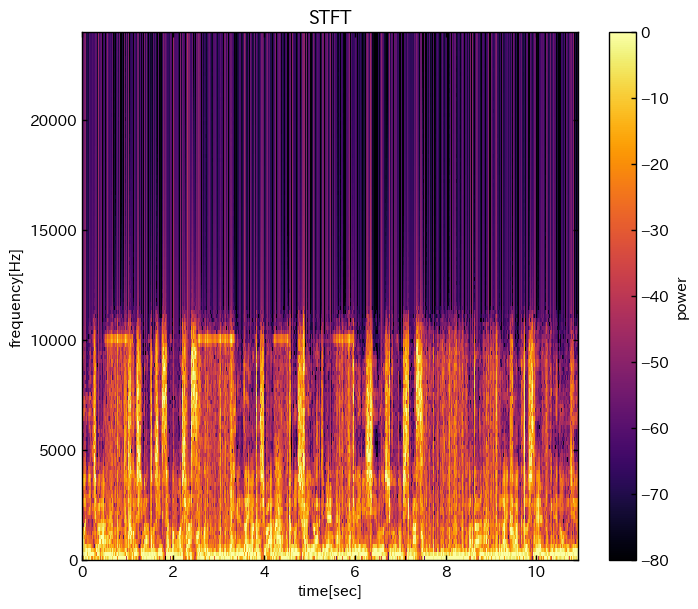

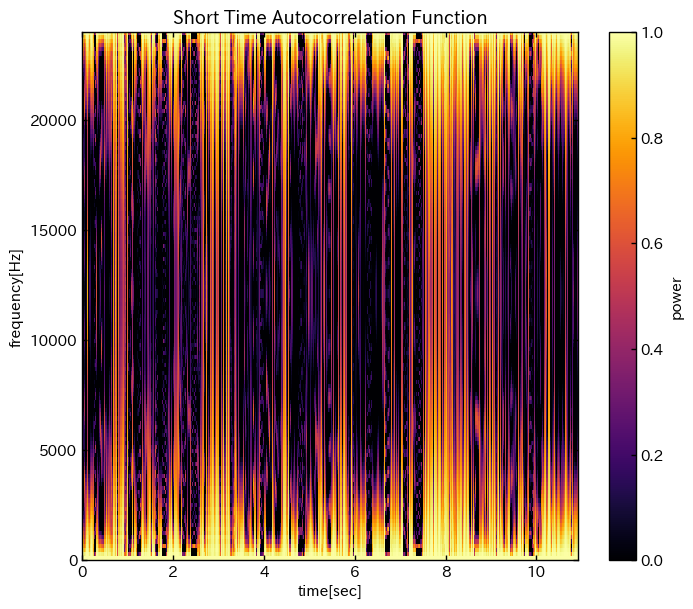

In [38]:
wav_rlpf.plot_spectrogram_acf()

In [39]:
wav.wave_write("../../sample_wav/fuku_lpf4khz.wav", wav_lpf)

In [40]:
wav_noise = wave_process.wave_process("../../sample_wav/fukushima.wav")

分析対象ファイル： ../../sample_wav/fukushima.wav
チャンクサイズ： 3098892
サンプルサイズのバイト数： 2
チャンネル数： 1
wavファイルのサンプリング周波数： 48000
パラメータ :  _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=3098892, comptype='NONE', compname='not compressed')
wavファイルのデータ個数： 3098892


In [41]:
print(wav_noise.data)
t = np.arange(0, wav_noise.chunk_size*1/wav_noise.fs, 1/wav_noise.fs) # 時間 [s]
wav_noise.data = wav_noise.data +  10 * np.sin(2*np.pi*5000*t)
print(wav_noise.data)

[ 1.43432617e-03  1.22070312e-03  1.22070312e-03 ... -6.10351562e-05
 -1.22070312e-04  0.00000000e+00]
[ 1.43432617e-03  6.08883499e+00  9.66047897e+00 ... -3.82689536e+00
  2.58806838e+00  7.93353340e+00]


In [42]:
wav_nres = research_tools.ResearchTools(y=wav.data[:524288], fft_N=524288, fs=wav_noise.fs, window="hamming")

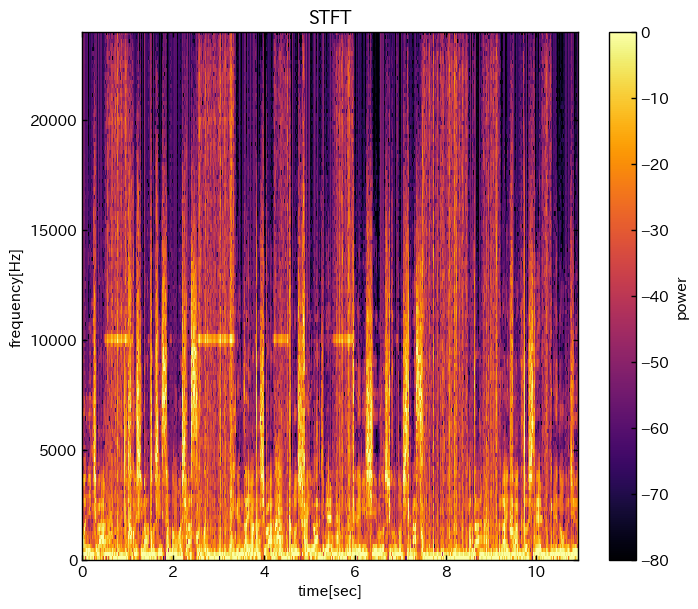

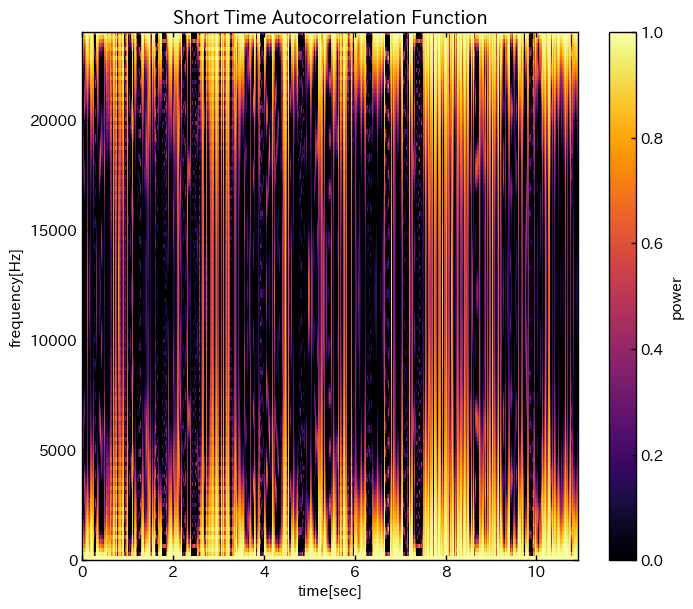

In [43]:
wav_nres.plot_spectrogram_acf()

In [44]:
wav_noise.wave_write(filename="../../sample_wav/wav_noise.wav", data_array=wav_noise.data)